<a href="https://colab.research.google.com/github/Mario-U-KY/DataScience/blob/main/2_6_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>2.6 Probability

머신러닝은 결국 예측을 하는 것. 추천시스템, 이상치 감지, 강화학습 등 확률에 대한 생각을 하지 않을 수 없다.
<br>
 

<h2>2.6.1 Basic Probability Theory

가상의 주사위는 1이 나올 확률이 1/6, but 실제 주사위는 그 확률을 계산하기 위해서는 많은 횟수를 시행한 뒤 그 결과를 6으로 나누어 expected value를 구하는 방법으로 얻어내야한다. 충분한 시행이 뒷받침되었을 때 '큰 수의 법칙'에 의해 실제 내제된 확률에 점점 가까워진다. 직접 확인해 보자.

In [1]:
pip install torch torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U d2l


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

Sampling을 시행해보자 number of discrete choice에서 부터 나온 분포를 multinomial distribution이라고 한다.

In [5]:
fair_probs = torch.ones([6])/6   #[1/6,1/6,1/6,1/6,1/6,1/6]확률들.
multinomial.Multinomial(1, fair_probs).sample() #1은 count횟수

tensor([0., 0., 1., 0., 0., 0.])

In [6]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 3., 3., 0., 2., 1.])

In [7]:
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts/1000


tensor([0.1670, 0.1720, 0.1730, 0.1630, 0.1670, 0.1580])

1000회 시행하니 결과가 0.167에 근사하게 나온다

10번 sampling 하는 500개의 그룹을 생성해서 visualize 해보자

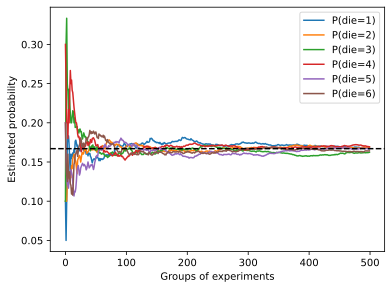

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) #500그룹
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)

d2l.set_figsize((6,4.5))
for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(),
  label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167, color = 'black', linestyle = 'dashed')
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()



이 이하는 확률론에 대한 수식적 내용만 포함되어있으므로, Markdown으로 굳이 작성하지 않는다. 아레 페이지 참조할 것<br>
https://d2l.ai/chapter_preliminaries/probability.html